It's time to call it — I don't think the [Julia programming
language](https://julialang.org) is going to make it into the data analysis
mainstream.

You'll see more data on this below.  In summary, there is now some evidence,
particularly from Stack Overflow trends, and the Popularity of Programming
Languages site, that Julia uptake has plateaued.

Some people hoped that Julia would be the One Language to Rule Them All, at
least in science.  In order to get there, it needed to have a plausible shot
at competing with Python, and to do that, it would need to grow quickly.

I think the data here says it isn't growing quickly.  I think Julia is not
going to be able to compete with Python, and that it will remain a niche
language that is highly specialized in numerical processing.  And, if I had to
guess, I would guess that it will start to decline slowly, as it becomes
clearer that it is not the language of the future that some had hoped.

I can't sensibly comment on why Julia has not grown more quickly, but here are
some reasoned critiques:

* [Why I no longer recommend Julia](https://yuri.is/not-julia) by Yuri
  Vishnevsky.
* [What's bad about Julia?](https://viralinstruction.com/posts/badjulia/) by
  Jakob Nybo Nissen.
* [My experiences with Julia](https://weissmann.pm/julialang/) by Volker
  Weissmann.
* [Giving up on
  Julia](https://www.zverovich.net/2016/05/13/giving-up-on-julia.html) by
  Victor Zverovich.

## The data

This is a further update from my previous three posts on uptake and activity
for the [Julia programming language](https://julialang.org).

* [Julia in 2019]({filename}/hows-julia.ipynb);
* [Julia in 2020]({filename}/hows-julia-2020.ipynb).
* [Julia in 2021]({filename}/hows-julia-2021.ipynb).

As for the previous posts, the source for this document is a Jupyter Notebook:
`time-to-call-it.ipynb` notebook. Get the notebook from [Github repository of
this blog](https://github.com/matthew-brett/asterisk-blog).  I've also plotted
Julia's Google search trends.

## Summary

As for the previous posts, I collected time-series data from the Julia language
repository commits, proportion of Github PRs, and two language ranking sites.

* Web searches for Julia are flat and at a low level.
* Commits on the main Julia repository have been flat since mid 2019.
* Julia commit percentages on Github have been flat since 2018.
* TIOBE index scores have been hovering around the 0.5% level since mid
  2020 (compared to around 12% for Python).
* Jula dropped from 24th to 28th in the Redmonk Programming Ratings, from June
  2020 to June 2021 (it's difficult to work out what happened after that).
* Stack Overflow trends for Julia show signs of flattening out at around 0.1%
  (compared to around 16% for Python).
* The Popularity of Programming Languages website has Julia at a fairly flat
  0.4% since mid 2020, compared to around 27% for Python.

The subheadings below mostly match those from the previous posts.  See those
posts for more detail on methods.

## Google search trends

This is the [graph of worldwide Google searches](https://trends.google.com/trends/explore?date=all&q=%2Fm%2F0j3djl7,%2Fm%2F0212jm,%2Fm%2F0rphppq) for the *topics* Julia (programming language), R (programming language) and Pandas (software):

![](images/google_trends_2022_07.png)

## Health of the Julia repository

This is an update on the health of the code repository for the Julia language
and its standard libraries.

In [1]:
from collections import Counter
import datetime as dt
import itertools

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

As for the previous posts, I analyzed commits of the [Julia Language repository](https://github.com/JuliaLang/julia) using some [code by Thomas Caswell](https://gist.github.com/tacaswell/e95cb2d57ca3783ffc40).

<!---
echo 'time&name' > commits_time_author.csv;
git log --no-merges --since=2013-01-01 --pretty=format:'%at&%aN <%aE>' >> commits_time_author.csv
-->

There's a copy of the commit data in `julia_commits_current.csv` in
[downloads/julia_commits_curent.csv](../downloads/julia_commits_current.csv).

In [2]:
commits = pd.read_csv('downloads/julia_commits_current.csv', sep='&')

In [3]:
stop_dt = dt.datetime(2022, 7, 9)

The next figure is a plot of the number of commits and number of committers per week:

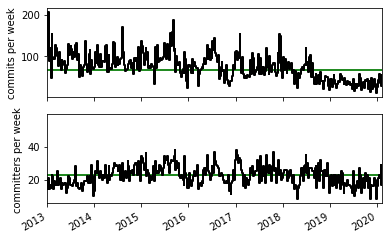

In [4]:
def stats_plotter(ax, left_edges, unq_by_week, col, ylabel):
    ln, = ax.step(left_edges,
                  unq_by_week[col], color='k', where='post', lw=2)

    hln = ax.axhline(unq_by_week[col].mean(), color='forestgreen', zorder=0, lw=2)
    ax.set_ylabel(ylabel)
    return ln, hln


def by_window_binner(ax1, ax2, commits, start, stop, step, window_name):
    edges = np.arange(start, stop + step, step)
    left_edges = [dt.datetime.fromtimestamp(t) for t in edges[:-1]]

    gb = commits.groupby(pd.cut(commits['time'], edges))
    unq_by_bin = gb.agg(lambda x: len(set(x)))

    stats_plotter(ax1, left_edges, unq_by_bin, 'time', 'commits per {}'.format(window_name))
    stats_plotter(ax2, left_edges, unq_by_bin, 'name', 'committers per {}'.format(window_name))

start = dt.datetime(2013, 1, 1).timestamp()
stop = stop_dt.timestamp()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
by_window_binner(ax1, ax2, commits, start, stop, 7*24*60*60, 'week')
ax1.set_xlim((dt.datetime(2013, 1, 1), dt.datetime(2020, 2, 7)))
fig.autofmt_xdate()

## Percentage of all Github pull requests

This is an update of the proportion of Github Pull Requests that are in the
Julia language, and others, from data scraped by hand from the [Githut 2.0
site](https://madnight.github.io/githut).  The latest version of these data is
[this link](../downloads/julia_gh_prs_current.csv)

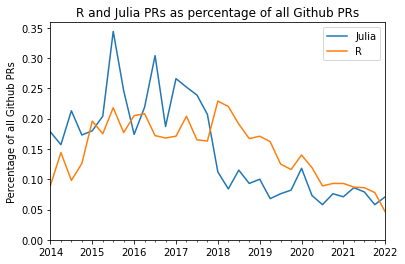

In [5]:
julia_prs = pd.read_csv('downloads/julia_gh_prs_current.csv')
julia_prs['Month'] = (julia_prs['Quarter'] - 1) * 3 + 2
datish = julia_prs.apply(
    lambda x: f"{x['Year']:0.0f}-{x['Month']:0.0f}", axis=1)
julia_prs.index = pd.to_datetime(datish)
jprs = julia_prs.loc[julia_prs.index <= stop_dt]
ax = jprs.plot(y='Julia', use_index=True)
jprs.plot(y='R', use_index=True, ax=ax)
plt.title("R and Julia PRs as percentage of all Github PRs")
plt.ylabel('Percentage of all Github PRs')
plt.ylim(0);

Julia's numbers have been steady at about 0.1% since 2019.

For comparison, here are the values for Python, R and Julia for the last two years:

In [6]:
jprs.head(4)[['Python', 'R', 'Julia']]

,Python,R,Julia
2022-02-01,16.689,0.046,0.071
2021-11-01,17.926,0.078,0.058
2021-08-01,15.943,0.086,0.079
2021-05-01,16.351,0.087,0.086


## TIOBE language index

The values here come from [archive.org
copies](https://web.archive.org/web/*/https://www.tiobe.com/tiobe-index/) of
<https://www.tiobe.com/tiobe-index>.

The data file with the index values is
[downloads/julia_tiobe_current.csv](../downloads/julia_tiobe_current.csv).

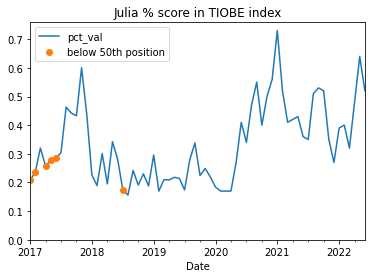

In [7]:
julia_tiobe = pd.read_csv('downloads/julia_tiobe_current.csv')
julia_tiobe['pct'] = julia_tiobe['pct'].apply(lambda x : x.strip())
julia_tiobe['pct_val'] = julia_tiobe['pct'].apply(
    lambda x : float(x[1:] if x.startswith('<') else x))
julia_tiobe.index = pd.to_datetime(julia_tiobe['year_month'])
jtio = julia_tiobe.loc[julia_tiobe.index <= stop_dt]
ax = jtio.plot(y='pct_val', use_index=True)
belows = jtio[jtio['pct'].apply(lambda x : x.startswith('<'))]
belows.plot(y='pct_val', use_index=True,
            style='o', label='below 50th position', ax=ax)
plt.title('Julia % score in TIOBE index')
plt.xlabel('Date')
plt.ylim(0);

As a reminder, the TIOBE index derives from [counts of search index
hits](https://www.tiobe.com/tiobe-index/programming-languages-definition) for
particular languages.

The graph shows a moderate uptick in the Julia percent score from mid 2020, but this seems to have stabilized since then, with moderate variation.

## Redmonk Programming Language Rankings / Stack Overflow

The [Redmonk
ratings](https://redmonk.com/sogrady/category/programming-languages) only list
the top 20 languages, and Julia is not in the top 20. The text of the [June
2020 rankings](https://redmonk.com/sogrady/2020/07/27/language-rankings-6-20)
note Julia at +0 change, and the June 2021 page (see below) says that Julia's
position then was 24th.  The [January 2021
ratings](https://redmonk.com/sogrady/2021/03/01/language-rankings-1-21/) don't
mention Julia, but the [June 2021
ratings](https://redmonk.com/sogrady/2021/08/05/language-rankings-6-21/) have:

> ... as a language we are periodically asked about, it’s worth noting that Julia has actually taken a few steps back. A year ago at this time Julia was poised just outside the Top 20 at #24, but in this quarters run it had dropped back to #28.

There's no mention of Julia in the [January 2022 ratings](https://redmonk.com/sogrady/2022/03/28/language-rankings-1-22/)

Some data for the Redmonk rankings come from [Stack Overflow
data](https://insights.stackoverflow.com/trends).  Here is an update of the
percentage of Stack Overflow questions on Julia:

![SO Julia](images/so_julia_2022-07.png)

This graphic is a screen shot from the [PopularitY of Programming
Languages](https://pypl.github.io/PYPL.html) website:

![](images/pypl_2022-07.png)

Notice the logarithmic scale.  This plot seems to reflect the uptick we saw in
the TIOBE index, as well as the subsequent plateau.  The PYPL site notes that
"The raw data comes from Google Trends.", so PYPL is probably looking at the
same data as TIOBE (above).